# Marketing Analytics 

The following project takes a look at the marketing data of customers. The purpose of the project is to find the most important products to sell, the most important targeting group and the distribution channel.

### Import Libriries

In [2]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pickle

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("ifood_df.csv")
df.head()


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [4]:
df.describe()


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


In [5]:
df_products = df[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']]
df_products.describe()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143
std,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000
50%,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000
75%,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000
max,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000


In [6]:
# df.drop('education', inplace=True, axis=1)
# df


In [7]:
df["education_Graduation"].replace({1: 2}, inplace=True)
df["education_Master"].replace({1: 3}, inplace=True)
df["education_PhD"].replace({1: 4}, inplace=True)
df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,2,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,2,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,2,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,2,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,4,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,2,0,0,1094,847,0
2201,64014.0,2,1,56,406,0,30,0,0,8,...,1,0,0,0,0,0,4,436,428,1
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,2,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,3,0,782,721,0


In [8]:
df_education =df[['education_Basic','education_Graduation','education_Master','education_PhD']]
df_money = df[['Income','Recency']]
df_products = df[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']]
df_purchases = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]


In [9]:
df_education_stack = df_education.stack().reset_index()
# df_education_stack.drop(['level_0','level_1'], inplace=True, axis=1)
df_education_stack
# df['Education'] = df_education_stack

# df.head(15)

,level_0,level_1,0
0,0,education_Basic,0
1,0,education_Graduation,2
2,0,education_Master,0
3,0,education_PhD,0
4,1,education_Basic,0
...,...,...,...
8815,2203,education_PhD,0
8816,2204,education_Basic,0
8817,2204,education_Graduation,0
8818,2204,education_Master,0


### Data Cleaning 

In [10]:
df.shape


(2205, 39)

In [11]:
print('The dataset has {} rows and {} columns'.format(df.shape[0],df.shape[1]))


The dataset has 2205 rows and 39 columns


In [12]:
df.info(max_cols=len(df))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [13]:
# Checking for Null Values
print('Null Values:',df.isnull().values.sum())
print('NA values:',df.isnull().values.any())

# If dataset had null values 
df=df.dropna()
print('Null Values:',df.isnull().values.sum())
print('NA values:',df.isnull().values.any())


Null Values: 0
NA values: False
Null Values: 0
NA values: False


### EXPLORATORY DATA ANALYSIS (EDA) AND VISUALISATION.


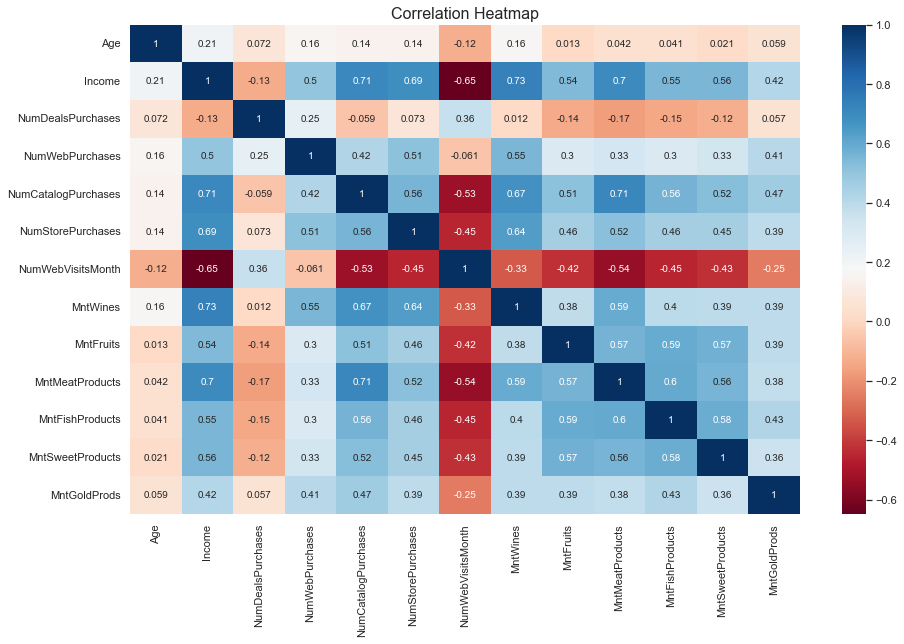

In [14]:
# df_education =df[['education_Basic','education_Graduation','education_Master','education_PhD']]
# df_money = df[['Income','Recency']]
# df_products = df[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']]
# df_purchases = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]


df_heat = df[['Age','Income','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']]

plt.figure(figsize=(15,9))
sns.heatmap(df_heat.corr(),annot=True,cmap='RdBu')
plt.title('Correlation Heatmap',fontsize=16)
plt.yticks(rotation =0)
plt.show()

Accordingly, we can see that such products as Meat and Wine have the strongest correlation between food products. Meanwhile, Income contributes to purchasing wine and meat products. Interesting to find that purchasing through catalogue Numcatalogpurchases is strongly correlated to the income as well. In the end, Golden products have a strong correlation with the income and catalogue purchasing. Therefore, the main look will be upon that conditions.

In [29]:
df['education_Basic'].sum()
df['education_Graduation'].sum()
df['education_Master'].sum()
df['education_PhD'].sum()

1904

In [30]:
# df_education_stack
# df_education =df[['education_Basic','education_Graduation','education_Master','education_PhD']]

df1_wine = df.loc[df['education_Basic'] == 1, 'MntWines'].sum()
df2_wine = df.loc[df['education_Graduation'] == 2, 'MntWines'].sum()
df3_wine = df.loc[df['education_Master'] == 3, 'MntWines'].sum()
df4_wine = df.loc[df['education_PhD'] == 4, 'MntWines'].sum()
wine = [df1_wine, df2_wine, df3_wine, df4_wine]
wine


# Therefore wine is at most bought by education graduates at bachelor with 318100 spent



[391, 318100, 121499, 194957]

In [31]:
df1_meat = df.loc[df['education_Basic'] == 1, 'MntMeatProducts'].sum()
df2_meat = df.loc[df['education_Graduation'] == 2, 'MntMeatProducts'].sum()
df3_meat = df.loc[df['education_Master'] == 3, 'MntMeatProducts'].sum()
df4_meat = df.loc[df['education_PhD'] == 4, 'MntMeatProducts'].sum()

meat = [df1_meat, df2_meat, df3_meat, df4_meat]
meat

# Therefore meat is at most bought by education graduates at bachelor with 199575 spent


[618, 199575, 59457, 77860]

In [23]:
df1_income = df.loc[df['education_Basic'] == 1, 'Income'].mean()
df2_income = df.loc[df['education_Graduation'] == 2, 'Income'].mean()
df3_income = df.loc[df['education_Master'] == 3, 'Income'].mean()
df4_income = df.loc[df['education_PhD'] == 4, 'Income'].mean()

income = [df1_income, df2_income, df3_income, df4_income]
income

#As shown, people with education make at least 50k USD

[20306.25925925926, 51984.00808625337, 52629.57967032967, 55220.58193277311]

In [24]:
Age_mean_grad = df.loc[df['education_Graduation'] == 2, 'Age'].mean()
Age_mean_grad

#The average age is found to be ~50 Y.O

50.38185085354897

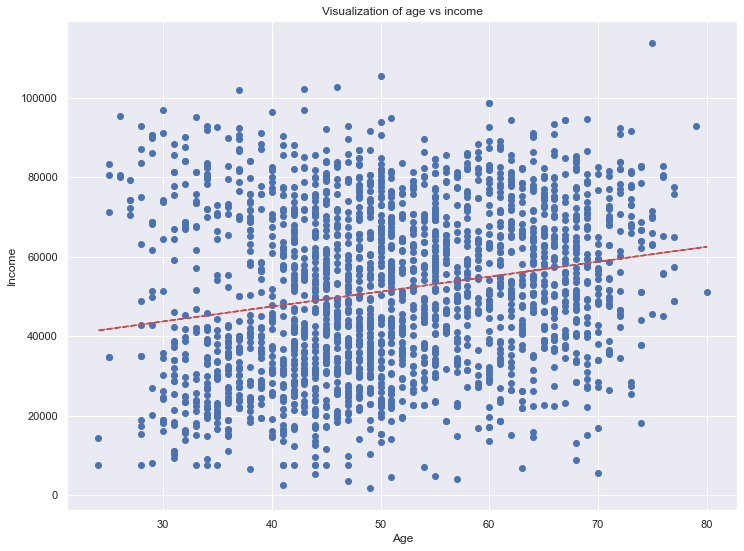

In [32]:
#Visualization of raw data
plt.figure(figsize = (12, 9))
plt.scatter(df.Age, df.Income)
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Visualization of age vs income')

z = np.polyfit(df.Age, df.Income, 1)
p = np.poly1d(z)
plt.plot(df.Age,p(df.Age),"r--")


Text(0.5, 1.0, 'Visualization of Income and Spent on Wine')

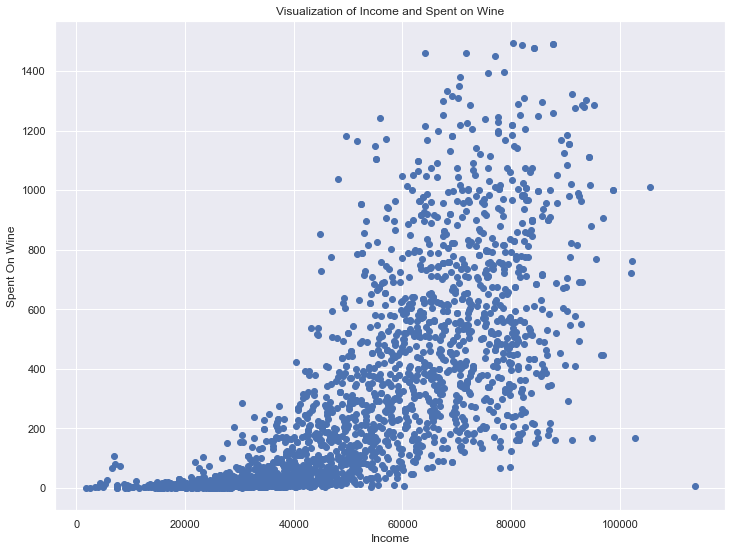

In [33]:

wines_sum = df['MntWines'].sum()
# print(months)

plt.figure(figsize = (12, 9))
plt.scatter(df.Income, df.MntWines)
plt.xlabel('Income')
plt.ylabel('Spent On Wine')
plt.title('Visualization of Income and Spent on Wine')

# z = np.polyfit(df.Income, df.MntWines, 1)
# p = np.poly1d(z)
# plt.plot(df.Income,p(df.Income),"r--")


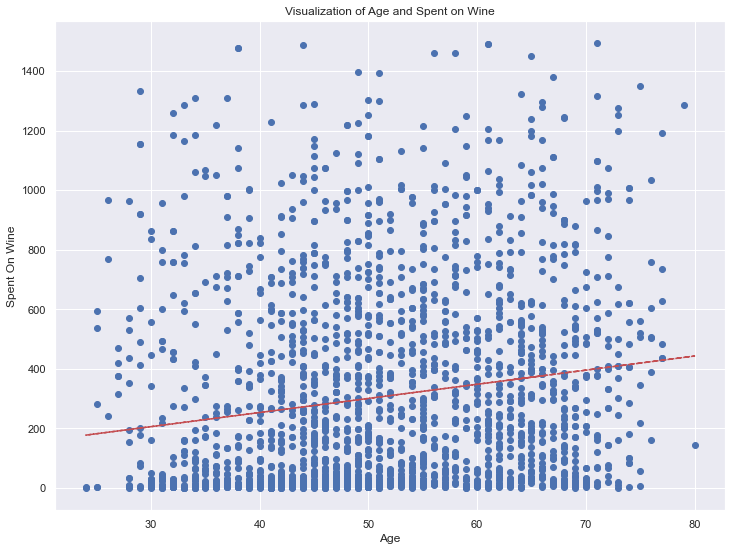

In [34]:

wines_sum = df['MntWines'].sum()
# print(months)

plt.figure(figsize = (12, 9))
plt.scatter(df.Age, df.MntWines)
plt.xlabel('Age')
plt.ylabel('Spent On Wine')
plt.title('Visualization of Age and Spent on Wine')

z = np.polyfit(df.Age, df.MntWines, 1)
p = np.poly1d(z)
plt.plot(df.Age,p(df.Age),"r--")


Text(0.5, 1.0, 'Visualization of Income and Spent on Meat')

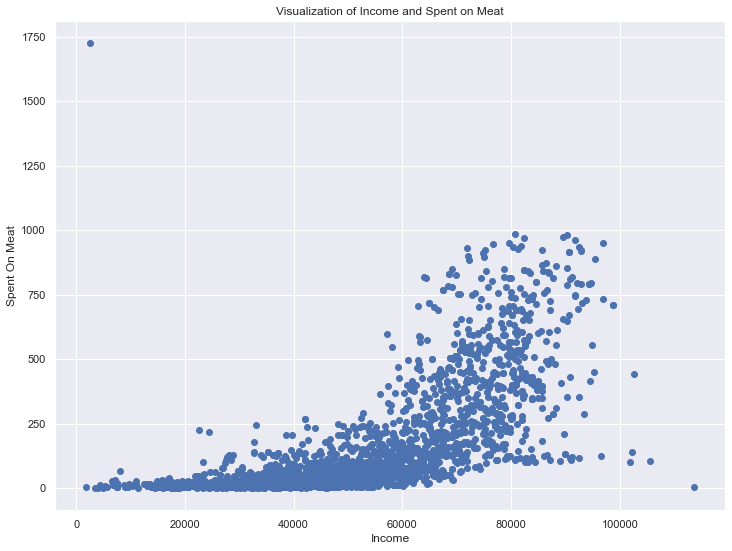

In [35]:
# df_products = df[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']]
# print(months)

plt.figure(figsize = (12, 9))
plt.scatter(df.Income, df.MntMeatProducts)
plt.xlabel('Income')
plt.ylabel('Spent On Meat')
plt.title('Visualization of Income and Spent on Meat')




Text(0.5, 1.0, 'Visualization of raw data')

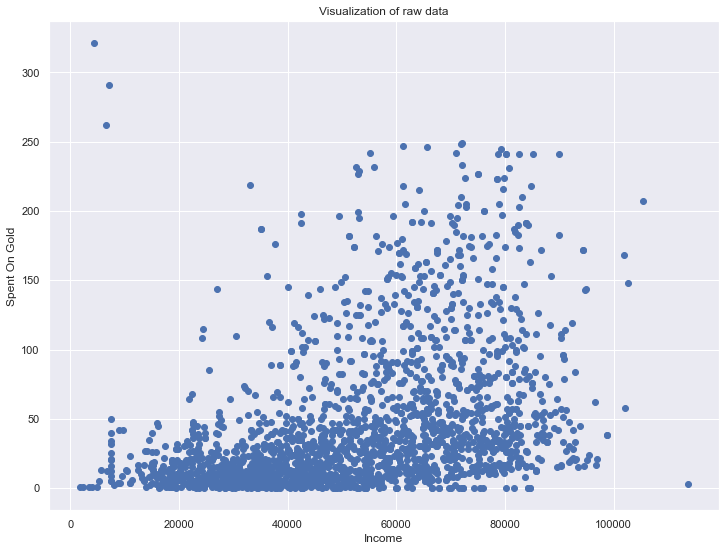

In [36]:
plt.figure(figsize = (12, 9))
plt.scatter(df.Income, df.MntGoldProds)
plt.xlabel('Income')
plt.ylabel('Spent On Gold')
plt.title('Visualization of raw data')

## Conclusion

Hence, the company should be trying to target people age 50 with education. They should be promoting the combinations of meat and wine combined. It should be done by distributing more catalogues. Besides, in the catalogues, golden products should be also included.